

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдала задание:) Ты проделала большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [79]:
import pandas as pd
import matplotlib.pyplot as plt



In [80]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Всего в таблице 22 столбца, описывающие характеристики квартир, и 23 699 строки по количеству квартир, выставленных на продажу. В 14 столбцах пропущены значения. Данные значения могут быть пропущены как случайно по ошибке пользователя (данные были введены вручную), так и не случайно. Возможно, пользователь не предоставил информацию по данным пунктам намеренно, либо не посчитав нужным указывать все параметры квартиры, либо по причине их отсутствия. Картографические данные могли некорректно определиться автоматически. 
Присутствуют все виды типов данных, но в некоторых столбцах их необходимо заменить для корректной работы. 


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Отличное начало, радует, что основательно подходишь к анализу с самого начала работы

### Шаг 2. Предобработка данных

### Обработка пропусков

In [81]:
#узнаем количество и долю пропусков 
display(data.isnull().sum())
display(data.isnull().sum() / len(data))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [82]:
#удалим пропуски в двух столбцах
data.dropna(subset = ['locality_name'], inplace = True) 
data.dropna(subset = ['floors_total'], inplace = True) 

In [86]:
#смотрим пропуски в столбце living_area
living_area_nan = data[data['living_area'].isnull()]
display(living_area_nan.head(5))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


In [83]:
#какова доля квартир в зависимости от количества комнат
display(data['rooms'].value_counts()/ len(data))

1     0.339656
2     0.335116
3     0.245237
4     0.049735
5     0.013792
0     0.008233
6     0.004413
7     0.002504
8     0.000509
9     0.000339
10    0.000127
14    0.000085
11    0.000085
19    0.000042
12    0.000042
16    0.000042
15    0.000042
Name: rooms, dtype: float64

In [95]:
#создадим новый столбец, разделенный на три категории по количеству комнат
def rooms_qty (rooms):
    
    if rooms <= 1:
                return 'однокомнатные'
    elif rooms > 1 and rooms <= 2:
                return 'двухкомнатные'
    else: 
                return 'многокомнатные'
    
             
data['rooms_qty'] = data['rooms'].apply(rooms_qty)
display(data['rooms_qty'].value_counts())

data['living_area'] = data['living_area'].fillna('0')
for element in data['rooms_qty'].unique():
        living_area_median = data['living_area'][data['rooms_qty']== element].median()
        data.loc[(data['living_area'] == '0') & (data['rooms_qty'] == element), 'living_area'] = living_area_median
  
 
data['kitchen_area'] = data['kitchen_area'].fillna('0')
for element in data['rooms_qty'].unique():
        kitchen_area_median = data['kitchen_area'][data['rooms_qty']== element].median()
        data.loc[(data['kitchen_area'] == '0') & (data['rooms_qty'] == element), 'kitchen_area'] = kitchen_area_median


однокомнатные     8198
двухкомнатные     7897
многокомнатные    7470
Name: rooms_qty, dtype: int64

In [92]:
#заменяем пропуски на медиану
ceiling_height_avg = data['ceiling_height'].median()
#display(ceiling_height_avg)
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_avg)
days_exposition_avg = data['days_exposition'].median()
#display(days_exposition_avg)
data['days_exposition'] = data['days_exposition'].fillna(days_exposition_avg)


In [93]:
#заменяем пропуски на 'ноль'
data['balcony'] = data['balcony'].fillna('0')

In [94]:
#проверяем замену пропусков
display(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
rooms_qty                   0
dtype: int64

### Вывод



Сначала выясним, сколько у нас пропусков в каждом столбце и какова их доля в общем количестве данных.
1. Определим пропуски, которые мы удалим, т.к. их доля незначительна и адекватная замена не представляется возможной:
locality_name - 0,2%
floors_total - 0,4%

2. Заменим пропуски медианным значением в следующих столбцах:
living_area - 8%
kitchen_area - 9,6%
Логично было бы вычислить пропуски, отняв, например, kitchen_area от total_area, но посмотрев на срез таблицы с NaN в living_area, мы видим, что в столбце kitchen_area значения также пропущены. Поэтому заменим медианным значением в зависимости от количества комнат в квартире. 
Разобьем категорию room по количеству комнат. Так как объекты с 10-19 комнатами встречаются очень редко, 4-9 комнатные квартиры встречаются чуть чаще, но все вместе это всего около 6% от общего количества. Поэтому отнесем их к трехкомнатным квартирам и назовем категорию "многокомнатные", что составит 32%, тогда по 34% будет в остальных категориях "однокомнатные" и "двухкомнатные". 
В каждой категории рассчитаем медианную площадь кухни и жилую площадь  и заменим все пропуски сначала на '0', а затем на медианную площадь согласно выведенной категории количества комнат.

3. Заменим пропуски медианным значением в данных столбцах, т.к. их доля высока, мы не можем это игнорировать. Плюс высота потолков чаще стандартная, может быть за исключением первых этажей, где могут быть помещения для объектов общего назначения:
ceiling_height - 38%
days_exposition - 13%

4. Заменить пропуски на значение '0', т.к. подразумевается отсутствие балкона в квартире
balcony - 48% это ноль

5. Оставить пропуски без изменения, т.к. для их замены требуется дополнительная и труднодоступная информация о точных адресах квартир.
cityCenters_nearest - 23% 

6. Оставить пропуски без изменения, т.к. данные категории не используются в решении задач данного исследования:
is_apartment 
airports_nearest
parks_around3000        
parks_nearest           
ponds_around3000       
ponds_nearest           

7. Проверим замену пропусков
Все пропущенные данные, необходимые для исследования, заменены.

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Просто класс! Очень здорово и детально, работа проделана колоссальная, продолжай в том же духе


### Замена типа данных

In [96]:
#тип данных заменяем на тип данных datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            2760 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null object
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_ar

### Вывод

Есть три столбца со строковыми значениями. Мы переведем в формат даты и времени только first_day_exposition, т.к. он будет участвовать в расчетах. Значения в locality_name и должны быть строковыми. is_apartment в расчетах не участвует. 

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


### Шаг 3. Посчитайте и добавьте в таблицу

In [97]:
#цена за квадратный метр
data['price_sqm'] = data['last_price'] / data['total_area']

In [99]:
#день недели, месяц и год публикации объявления
data['publication_weekday'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [100]:
#этаж квартиры; варианты — первый, последний, другой;
data.loc[data['floor'] == 1, 'floor_variant'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_variant'] = 'последний' 
data.loc[data['floor_variant'].isna(), 'floor_variant'] = 'другой' 
    

In [101]:
#соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

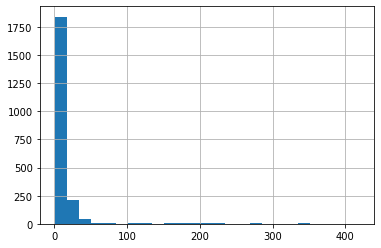

In [102]:
#изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
#построим гистограммы для каждого параметра.
data['total_area'].value_counts().hist(bins=25)

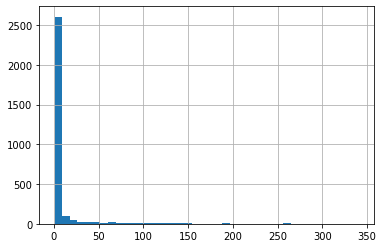

In [103]:
data['last_price'].value_counts().hist(bins=40)

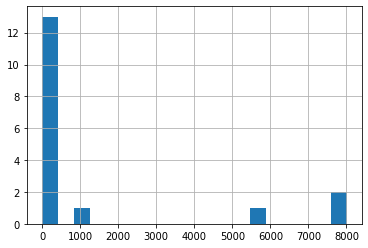

In [104]:
data['rooms'].value_counts().hist(bins=19)

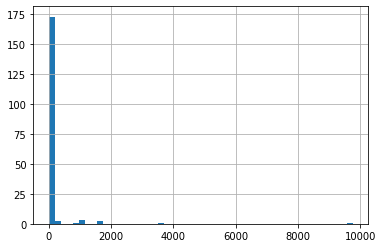

In [105]:
data['ceiling_height'].value_counts().hist(bins=50)

95.0

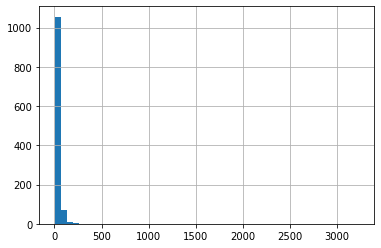

In [106]:
#Изучим время продажи квартиры.Посчитаем среднее и медиану. 
data['days_exposition'].value_counts().hist(bins=50)
data['days_exposition'].mean()
data['days_exposition'].median()

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Не забывай подписывать оси на графиках и сам график, иначе не залазя в код абсолютно не понятно, что изображено

(30, 80)

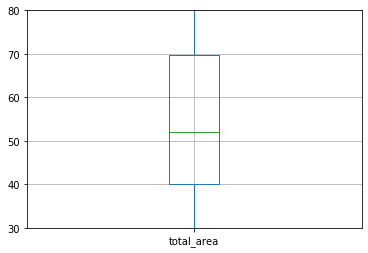

In [107]:
<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Не забывай подписывать оси на графиках и сам график, иначе не залазя в код абсолютно не понятно, что изображено#уберем редкие и выбивающиеся значения. Построим диаграмму размаха. 
data.boxplot(['total_area'])
plt.ylim(30,80)

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

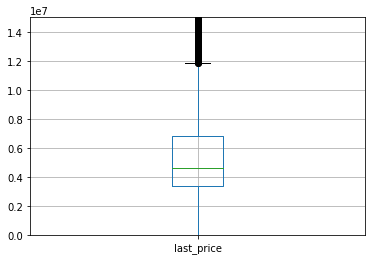

In [108]:
data.boxplot(['last_price'])
plt.ylim(0,15000000)
data['last_price'].describe()

(0, 5)

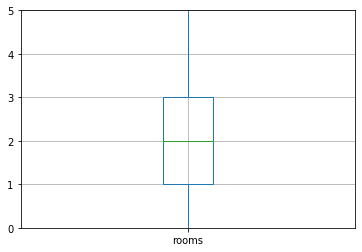

In [109]:
data.boxplot(['rooms'])
plt.ylim(0,5)

(2.3, 3)

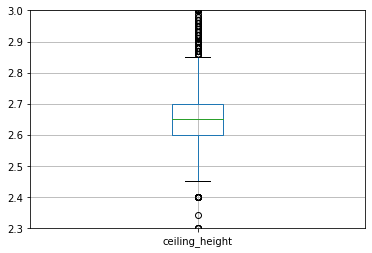

In [110]:
data.boxplot(['ceiling_height'])
plt.ylim(2.3,3)

(0, 250)

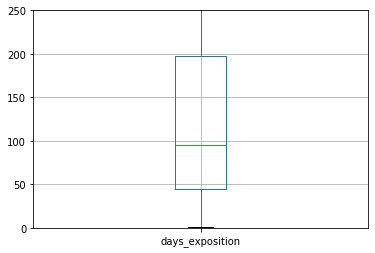

In [111]:
data.boxplot(['days_exposition'])
plt.ylim(0,250)

0.6536213939252806

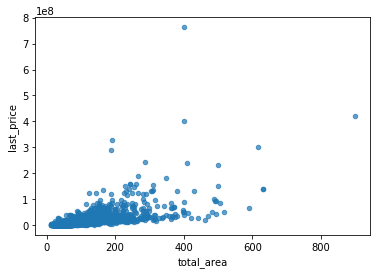

In [112]:
#Изучим, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 
display(data['last_price'].corr(data['total_area']))
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.7)


0.3631905485065748

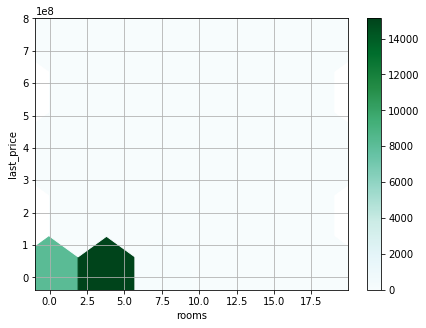

In [113]:
#зависимость цены квартиры от числа комнат
display(data['last_price'].corr(data['rooms']))
data.plot(x='rooms', y='last_price', kind='hexbin', gridsize=5, figsize=(7, 5), sharex=False, grid=True)

-0.2063531426431107

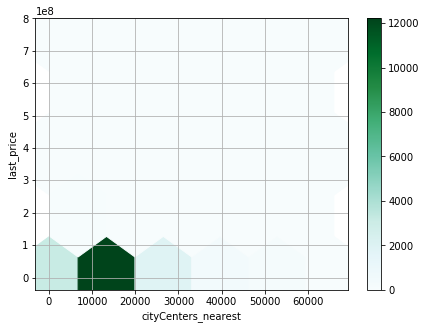

In [114]:
#зависимость цены от удалённости от центра
display(data['last_price'].corr(data['cityCenters_nearest']))
data.plot(x='cityCenters_nearest', y='last_price', kind='hexbin', gridsize=5, figsize=(7, 5), sharex=False, grid=True)

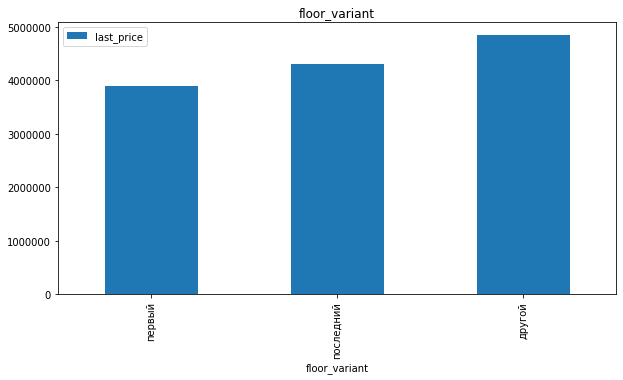

In [115]:
#зависимость цены от этажа
floor_pivot = data.pivot_table(index="floor_variant", values="last_price", aggfunc="median")
floor_pivot.sort_values(by='last_price', ascending=True).plot(y='last_price', kind='bar',title='floor_variant', figsize=(10, 5))


0.0013569211122710775

0.0027259571647347603

-0.042864152713611034

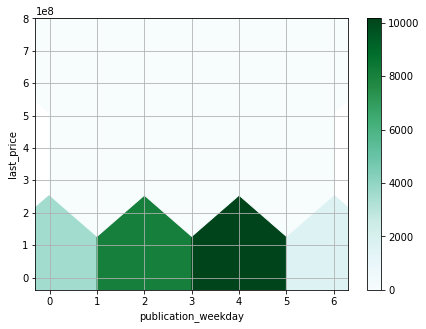

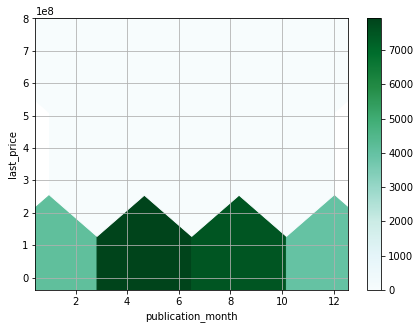

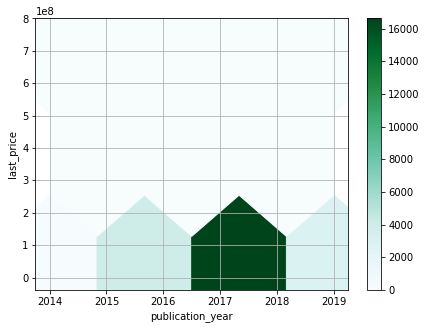

In [116]:
#зависимость цены от даты размещения: дня недели, месяца и года.
for column in ['publication_weekday', 'publication_month', 'publication_year']:
    data.plot(x=column,  y='last_price', kind='hexbin', gridsize=3, figsize=(7, 5), sharex=False, grid=True)
        
for column in ['publication_weekday', 'publication_month', 'publication_year']:  
    display(data['last_price'].corr(data[column]))

In [117]:
#выберем 10 населённых пунктов с наибольшим числом объявлений. 
display(data['locality_name'].value_counts().sort_values(ascending=False).head(10))

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [118]:
#средняя цена квадратного метра в этих населённых пунктах. 
#выделим населённые пункты с самой высокой и низкой стоимостью жилья. 
top_city = data['locality_name'].value_counts().sort_values(ascending=False).head(10).index
display(data
    .query('locality_name in @top_city')
    .pivot_table(index='locality_name', values= 'price_sqm', aggfunc='median')
    .sort_values(by= 'price_sqm', ascending=False)
);


,price_sqm
locality_name,
Санкт-Петербург,104774.535809
Пушкин,100000.000000
деревня Кудрово,91860.465116
посёлок Парголово,91642.857143
посёлок Мурино,85878.462169
посёлок Шушары,76829.268293
Колпино,74723.748474
Гатчина,67796.610169
Всеволожск,65789.473684


In [119]:
#создаем столбец с расстоянием до центра в километрах - округляем до целых значений и переводим в км. 
data['center_rounded_km'] = round(data['cityCenters_nearest']) 
data['center_rounded_km'] = round(data['cityCenters_nearest'] / 1000)
data['center_rounded_km'] = data['center_rounded_km'].astype('int', errors='ignore')
display(data.head(5))

#выделим квартиры в Санкт-Петербурге  
p_center = data.query('locality_name == "Санкт-Петербург"')
display(p_center)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,rooms_qty,price_sqm,publication_weekday,publication_month,publication_year,floor_variant,living_area_ratio,kitchen_area_ratio,center_rounded_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,95.0,многокомнатные,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,81.0,однокомнатные,82920.792079,1,12,2018,первый,0.460396,0.272277,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,558.0,двухкомнатные,92785.714286,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,46.25,9,NaN,...,424.0,многокомнатные,408176.100629,4,7,2015,другой,0.290881,0.060377,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,121.0,двухкомнатные,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,rooms_qty,price_sqm,publication_weekday,publication_month,publication_year,floor_variant,living_area_ratio,kitchen_area_ratio,center_rounded_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,95.0,многокомнатные,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,558.0,двухкомнатные,92785.714286,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,46.25,9,NaN,...,424.0,многокомнатные,408176.100629,4,7,2015,другой,0.290881,0.060377,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,121.0,двухкомнатные,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,NaN,...,95.0,двухкомнатные,110544.692737,3,4,2019,другой,0.418994,0.263966,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.30,4,NaN,...,29.0,однокомнатные,100566.572238,2,2,2018,другой,0.461756,0.257790,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.00,2,NaN,...,15.0,двухкомнатные,105769.230769,3,7,2018,другой,0.596154,0.115385,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.30,7,NaN,...,519.0,двухкомнатные,129903.978052,3,10,2016,другой,0.552812,0.145405,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.30,3,NaN,...,95.0,многокомнатные,72490.845228,1,3,2017,другой,0.547792,0.103356,4.0


In [120]:
#считаем среднюю цену для каждого километра. 
p_center_median = p_center.pivot_table(index="center_rounded_km", values="price_sqm", aggfunc="median")
display(p_center_median)


,price_sqm
center_rounded_km,
0.0,172619.047619
1.0,128485.110056
2.0,123035.513418
3.0,108469.112355
4.0,117952.262904
5.0,126932.465419
6.0,131835.227273
7.0,127017.083563
8.0,122781.988265


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93dcec26d0>]],
      dtype=object)

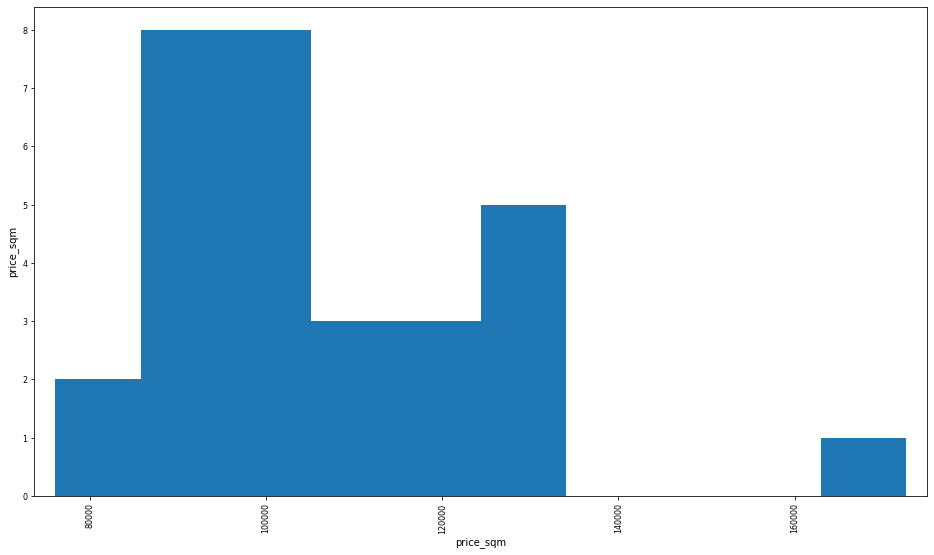

In [121]:
#график: как цена зависит от удалённости от центра. Определяем радиус центра города 
pd.plotting.scatter_matrix(p_center_median, figsize=(16, 9))  



In [122]:
#выделяем сегмент квартир в центре Санкт-Петербурга
p_center_flat = p_center.query('center_rounded_km <= 8')
display(p_center_flat)
                    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,rooms_qty,price_sqm,publication_weekday,publication_month,publication_year,floor_variant,living_area_ratio,kitchen_area_ratio,center_rounded_km
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,46.25,9,NaN,...,424.0,многокомнатные,408176.100629,4,7,2015,другой,0.290881,0.060377,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,121.0,двухкомнатные,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
24,8,6500000.0,97.20,2015-10-31,2,2.65,3.0,46.50,1,NaN,...,265.0,двухкомнатные,66872.427984,5,10,2015,первый,0.478395,0.201646,2.0
35,6,15500000.0,149.00,2017-06-26,5,2.65,5.0,104.00,4,NaN,...,644.0,многокомнатные,104026.845638,0,6,2017,другой,0.697987,0.114094,4.0
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,38.00,4,NaN,...,541.0,многокомнатные,279503.105590,1,10,2017,другой,0.236025,0.310559,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20,1,2.65,6.0,18.20,1,False,...,131.0,однокомнатные,90425.531915,4,5,2016,первый,0.387234,0.310638,5.0
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5.0,29.00,2,NaN,...,80.0,двухкомнатные,122093.023256,4,5,2018,другой,0.674419,0.139535,7.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.00,2,NaN,...,15.0,двухкомнатные,105769.230769,3,7,2018,другой,0.596154,0.115385,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.30,7,NaN,...,519.0,двухкомнатные,129903.978052,3,10,2016,другой,0.552812,0.145405,4.0


<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Комментарии стоит писать в специальных markdown ячейках, а не в коде

(50, 120)

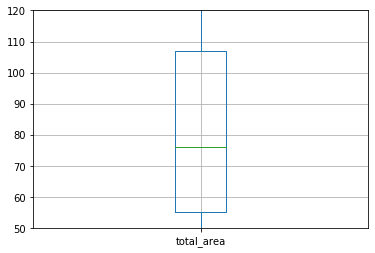

In [123]:
<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Комментарии стоит писать в специальных markdown ячейках, а не в коде#анализируем площадь, цену, число комнат, высоту потолков квартир в центре города
p_center_flat.boxplot(['total_area'])
plt.ylim(50, 120)

(0.9, 16000000)

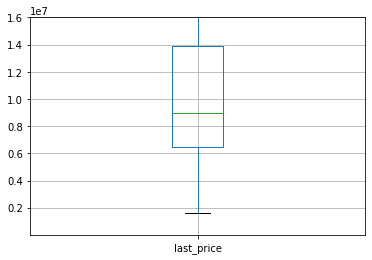

In [124]:
p_center_flat.boxplot(['last_price'])
plt.ylim(0.9, 16000000)

(0.5, 5.5)

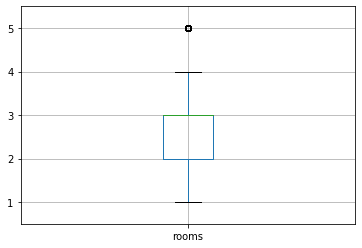

In [125]:
p_center_flat.boxplot(['rooms'])
plt.ylim(0.5, 5.5)

(2.2, 3.5)

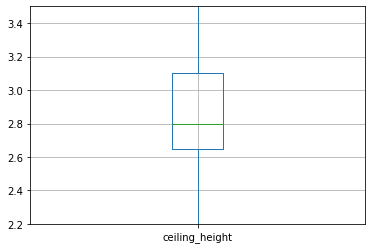

In [126]:
p_center_flat.boxplot(['ceiling_height'])
plt.ylim(2.2, 3.5)

(2, 300)

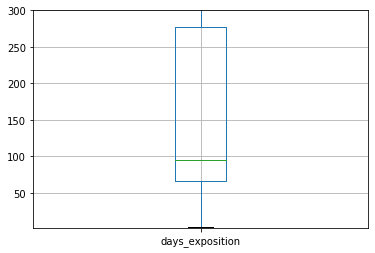

In [127]:
p_center_flat.boxplot(['days_exposition'])
plt.ylim(2, 300)

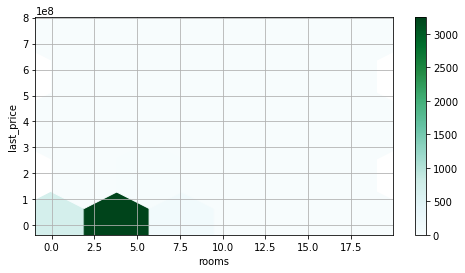

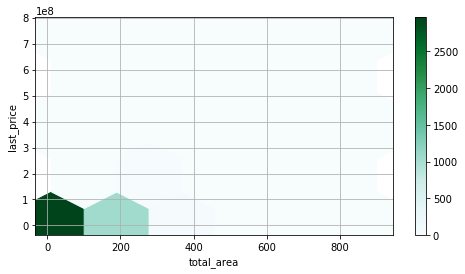

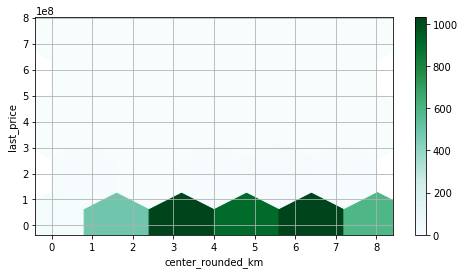

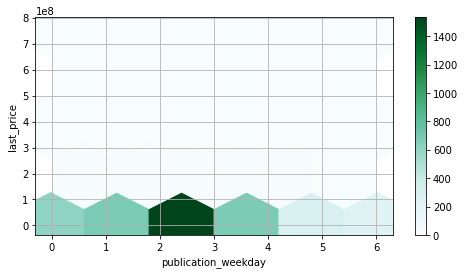

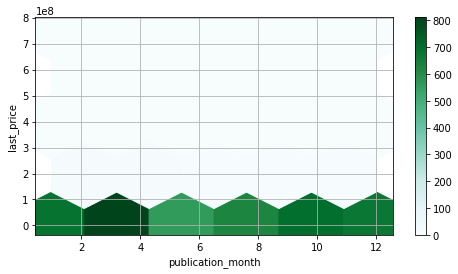

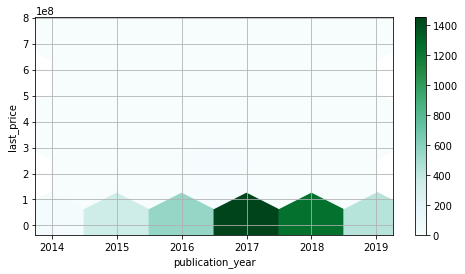

In [128]:
#изучим влияние различных факторов (число комнат, удалённость от центра, дата размещения объявления) 
#на стоимость квартиры в центре города
for column in ['rooms', 'total_area','center_rounded_km', 'publication_weekday', 'publication_month', 'publication_year']:
    p_center_flat.plot(x=column,  y='last_price', kind='hexbin', gridsize=5, figsize=(8, 4), sharex=False, grid=True)
        


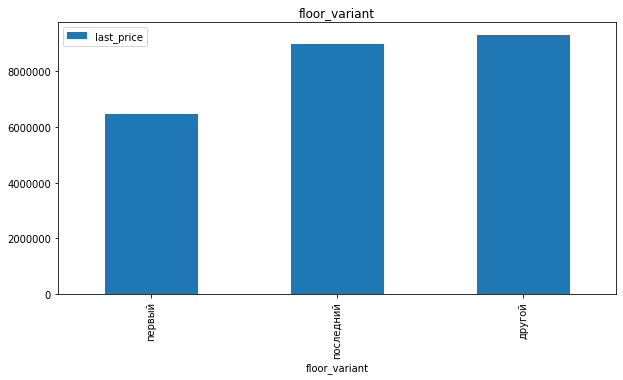

In [129]:
#изучим влияние различных факторов на стоимость квартиры (этаж)
p_center_pivot = p_center_flat.pivot_table(index="floor_variant", values="last_price", aggfunc="median")
p_center_pivot.sort_values(by='last_price', ascending=True).plot(y='last_price', kind='bar',title='floor_variant', figsize=(10, 5))


In [130]:
for column in ['rooms', 'total_area','center_rounded_km', 'publication_weekday', 'publication_month', 'publication_year']:  
    display(p_center_flat['last_price'].corr(data[column]))


0.3404792523530797

0.6389768490095962

-0.07610046762089095

0.02080848119844285

-0.00459050935495132

-0.0468758514562855

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Всё верно. но выводов стоит писать больше в будущих работах и подробнее описывать,что наблюдаешь на гарфиках

### Шаг 5. Общий вывод

1. Изучены следующие параметры квартир:

a. Площадь: согласно графику наибольшое количество квартир площадью до 25 м2, скорее всего, это студии. Далее квартиры до 45 м2, чуть меньше по количеству квартир 50 м2. Редко встречаются квартиры от 80 м2, 100-120 м2, 150-250 м2, 280 м2, 350 м2. Убрав выбросы, мы можем уточнить, что медианное значение равно 52 м2, 25% квартир площадью до 40 м2, 25% - до 70 м2.

b.Цена: дешевых квартир больше всего -  до 5 млн рублей. Есть предложения до 15 млн и меньше до 25 млн. Дорогих и очень дорогих квартир - от 50 млн. - продается немного. Диаграмма размаха уточняет медиану - 4,5 млн.рублей. 25% - около 3,5 млн.рублей, 25% - 7 млн.рублей.

c. Количество комнат: согласно графику больше всего двухкомнатных квартир - 34%, однокомнатных - 30%. Многокомнатных гораздо меньше. Диаграмма размаха подтверждает, что медиана - это двухкомнатные квартиры, но их около 50%, однокомнатных до 25%, а трехкомнатных и более - 25%. 

d. Высота потолка: 42% квартир имеют потолки высотой 2,7 м, 17% - 2,5 м, 8% - 3 м, 4% - около 5 м. Выпадающее значение больше 100 м, скорее всего опечатка, или указана высота в см. Убираем выпадающие значения и корректируем данные: медиана - 2,65 м, 25% потолков - высотой 2,52 м, 25% - 2,8 м.

2. Время продажи квартиры:

Среднее время продажи - 169, медианное - 95 дней. Согласно графику большинство квартир продается быстро - до 10-20 дней, следующий рубеж - до 90 дней. Но есть продажи длительностью более 1000 дней. Если квартира продается за 10 дней, то это очень быстрая продажа. 1200 дней - это необычно долго. Убрав выбросы в 1000-1200 дней и установив межквартильные размахи, мы видим, что 25% продаж происходит за период до 50 дней, 50% - до 95 дней, 75% - до 200 дней, 25% более чем за 200 дней.

3. Какие факторы больше всего влияют на стоимость квартиры? 

a. Площадь квартиры: коэффициент корреляции Пирсона 0,65 говорит о том, что цена квартиры зависит от площади, чем выше площадь, тем больше цена. Но стоимость и площадь растут, соответственно, до 10 млн.рублей и 180 м2. Квартиры с меньшей площадью могут стоит дешевле. За исключением выпадающих значений, например, на 200, 400, 600 м2.

b. Число комнат: коэффициент корреляции 0,36 - цена квартиры зависит от количества комнат в малой степени. Согласно графику самые дорогие квартиры - это 1-комнатные и 3-комнатные, около 11 млн. Более 3-х комнат цена снижается.

c. Удалённость от центра: чем дальше квартира, тем дешевле она стоит, коэффициент корреляции -0,2 подтверждает, что данная зависимость слабая. Самые дорогие квартиры удалены от центра на 13 км, по этой же цене есть квартиры в центре и в 30 км. Квартиры по цене 7 млн могут быть на расстоянии от центра, как 10, так и 20 и даже 30 км.

d.Этаж: В среднем квартиры на первом и последнем этажах продаются дешевле. Самые дешевые квартиры на первом этаже - до 3,8 млн. На последнем - до 4,2 млн.

e.Дата размещения объявления: нет прямой зависимости цены от даты размещения. Но квартиры дороже продавались по пятницам, в мае и в 2017 году.

4. Населённые пункты с самой высокой и низкой стоимостью жилья.

Самое дорогое жилье в Санкт-Петербурге (104,7 тыс.за 1 м2), самое дешевое жилье в Выборге (58,1 тыс за 1 м2). Также дорогими населенными пунктами считаются Пушкин и д.Кудрово (ближайший пригород Санкт-Петербурга)

5. Квартиры в Санкт-Петербурге:

Согласно графику центр Санкт-Петербурга занимает территорию по окружности от 0 до 8 км, возможно это соответсвует Центральному району СПб. В этом районе самая высокая стоимость 1 м2 у квартир на расстоянии до 1 км от центра и на расстоянии 6 км. За пределами центра стоимость 1 м2 падает на 17 000 рублей.

6. Квартиры в центре Санкт-Петербурга:

a. Средняя площадь квартиры в центре Санкт-Петербурга - 75 м2, что гораздо больше, чем в целом по региону. 25% квартир площадью до 55 м2, 25% - до 105 м2. 
Средняя цена квартиры - 9 млн.рублей, выше средней цены по городу и регионам. Диапазон цен в центре города - 6,5-14 млн.
Наиболее интересны квартиры с количеством комнат - 2, как и везде. Также продаются квартиры по 1-4 комнаты.
Высота потолков - 2,8 м при диапазоне 2,65 - 3,1 м. В центре в квартирах более высокие потолки.
Среднее время продажи - около 90 дней, не сильно отличается от 95 дней на продажу квартиры вне центра, но четвертая часть квартир продается за 60 дней, а также за 275 дней.

b. Факторы, влияющие на стоимость квартиры в центре:
i.цена квартиры зависит от количества комнат, но растет только до 3-х комнат, далее дополнительные комнаты будут только удешевлять квартиры.
ii.в центре города чем ниже площадь, тем дороже квартира. Самые дорогие - квартиры 25-30 м2 (возможно, студии в новых ЖК). Но также есть квартиры около 200 м2 по такой же стоимости.
iii.больше всего дорогих квартир на расстоянии 3,5 и 6,5 км, меньше в самом центре (возможно, центром считается площадь или сквер, где в принципе мало жилых квартир) и на окраине центра (8 км).
iv.также нет зависимости от дня, месяца и года публикации объявления, но дороже всего квартиры продавались по средам, в марте и в 2017 году.
v.как и во всем регионе, квартиры на первом и последнем этажах продаются дешевле. На первом этаже - можно купить квартиру до 6,5 млн, что очень недорого для центра. На последнем - до 8,5 млн, что даже ниже среднего для центра.

Таким образом, средние параметры квартиры в г.Санкт-Петербурге и близлежащих городах и поселках включают в себя: площадь - 52 м2, количество комнат - 2, высота потолка - 2,7 м по цене 4,5 млн.рублей за 95 дней. Если квартира будет на первом или последнем этаже, либо в г.Выборг, то купить можно еще дешевле.
В центре Санкт-Петербурга самое дорогое жилье с более высокими параметрами: это 2-комнатная квартира площадью 75 м2 с высотой потолка - 2,8 м за 9 млн.рублей. Продажа такой квартиры может занять также 90 дней.
На стоимость квартиры в центре города и во всем регионе влияет количество комнат, площадь, этаж и удаленность от центра, поэтому данные параметры должны быть обязательными для заполнения в форме подачи объявления. Возможно, следует установить функцию автоматического заполнения пустой ячейки с жилой площадью, если известна площадь кухни, на основании общей площади, и наоборот.





 

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Так вот где все выводы) Замечательный вывод покрывающий все аспекты проделанной работы! 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Удачи на следующих этапах, у тебя всё получится, только не сомневайся в себе и старательно подходи ко всем вопросам)

In [ ]:
<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Удачи на следующих этапах, у тебя всё получится, только не сомневайся в себе и старательно подходи ко всем вопросам)